#### 01. Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 02. Define parameters and plot the graph

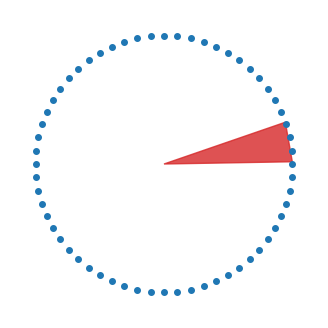

In [18]:
# Draw dotted circle and animate a rotating red wedge (clockwise, full 0->2π sweep)
import numpy as np
from matplotlib import patches, animation
from IPython.display import HTML

ox, oy = 0, 0
radius = 1
# evenly spaced sample points for dotted circle
samples = np.linspace(0, 2*np.pi, num=60, endpoint=False)
x = ox + radius * np.cos(samples)
y = oy + radius * np.sin(samples)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, y, linestyle='None', marker='o', markersize=4, color='tab:blue')
ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
# map coordinate ticks -1,0,1 to labels 0, pi/2, pi as requested
ticks_pos = [-1.0, 0.0, 1.0]
ticks_labels = ['0', r'\u03c0/2', r'\u03c0']
ax.set_xticks(ticks_pos)
ax.set_xticklabels(ticks_labels)
ax.set_yticks(ticks_pos)
ax.set_yticklabels(ticks_labels)
ax.axis('off')

# red wedge (triangle) parameters
wedge_width = np.deg2rad(18)  # angular width of wedge

def make_wedge(theta):
    # triangle from center to two points on circle defining the wedge
    p1 = (0.0, 0.0)
    p2 = (radius * np.cos(theta), radius * np.sin(theta))
    p3 = (radius * np.cos(theta + wedge_width), radius * np.sin(theta + wedge_width))
    return [p1, p2, p3]

poly = patches.Polygon(make_wedge(0.0), closed=True, color='tab:red', alpha=0.8)
ax.add_patch(poly)

def update(frame):
    # negate frame to get clockwise rotation
    theta = -frame
    poly.set_xy(make_wedge(theta))
    return (poly,)

# Use frames from 0 to 2*pi (full sweep); animation rotates clockwise due to negation above
frames = np.linspace(0, 2*np.pi, 360, endpoint=False)
anim = animation.FuncAnimation(fig, update, frames=frames, interval=30, blit=True)
# Render inline using JS animation (works in Jupyter/VS Code notebooks)
HTML(anim.to_jshtml())